# Lab Week 4

## EOSC 211

### Learning Objectives:

1. Do math with python! 

2. Write structured code following input-process-output format

3. Develop code with the scaffolding technique (source: HTTLACS?)

4. More plots!


### Intro


### Themes

computer math + - * / ** -- on scalars and vectors (arrays)

order of operations

plt.subplots() syntax, intro to OO programming?

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

## Part 1: Computer Math and Writing Stylish Code (Tutorial)

This is the hydrostatic equation. It relates *atmospheric pressure* to height above sea level. The pressure we measure at the surface is caused by the weight of the atmosphere above being held down by earth's gravity. As we move higher into the atmosphere, there is less air above (less weight pushing down), so the pressure decreases. 

$$
P = P_0\cdot e^{-(a/T)\cdot z}\tag{Hydrostatic Equation}
$$

where constants $a=0.0342 K/m$ and $P_0=101325 Pa$, and the other variables are defined in as:

| Symbol  | Variable      | SI Units   |
|:--------|:--------------|:------------|
| $P$     | Pressure      | $Pa$   |
| $T$     | Temperature   | $K$ |
| $z$     | Height Above Sea Level   | $m$ |

We would like to write code to calculate atmospheric pressure at any given height. In lecture, we practiced using Python's built in mathematical operators `+ = * / **`. Now we will apply these skills to *mathematically describe the state of the atmosphere* and make some informative graphics to communicate our results. As always when tackling a more complex problem, keeping our code organized is incredibly helpful, especially when we need to circle back to either modify or debug our program.

### Tips on Writing Code With Style:

* Be very careful with unit conversion.  Humans usually like to express temperature in Celsius, but the thermodynamic equations require temperatures in Kelvin.  That means that you need to distinguish between two temperatures with names like `Tk` and `Tc`, where `Tk = Tc + 273.15`. Make sure that you convert to Kelvin as soon as you can. Do it only once at the start and (if necessary for output) once at the end.

* Choose good variable names. Don’t use single letters like `T` and `P` for variable names in a script. It makes it very hard to do search and replace with your editor when you want to change them, and the names aren’t very meaningful to others who might read your code. Remember that Python is *case sensitive* so `P` and `p` are two different variables. Also, it is super helpful to note the units of each variable with comments.

* As much as you can, separate your script into 4 parts IN THIS ORDER:

>**1.  INPUTS:**  These  are  variables  whose  values  you  might  want  to  change  if  you  run  the  program multiple times.

>**2.  INTERNAL DEFINITIONS or CONSTANTS:** These are variables that are defined as constants which you will never change, or some simple conversions (e.g. Celcius to Kelvin)

>**3.  CALCULATIONS:** This is where the complicated parts of the procedure go

>**4.  the OUTPUTS:** What you do once the math is finished (e.g. plotting).

* It is useful to separate the parts by white space, and liberally comment your code. Note that not all tasks in 2 and 3 are easily separated, and sometimes plotting happens earlier than the end of the program, but it’s a good idea to always approach problems this way initially.

### Coding the Hydrostatic Equation

In [13]:
# inputs
Tc = 20  # deg C
height = 8849  # m

# internal definitions
Tk = Tc + 273.15  # K
hstat_const = 0.0342  # K/m
P0 = 101325  # Pa

# calculations
pres = P0 * np.exp(-hstat_const / Tk * height)  # hydrostatic equation

# outputs
print(pres)

36088.5266721627


Try playing with the inputs to see if our pressure calculator is working properly. We know that at the surface (ie $z$=0m), the pressure should equal the reference $P_0$ of 101325 Pa. On the summit of Mt Everest (8849m), pressure is roughly a third of that value. Waaay up high, (try setting $z$ to a billion or something) the pressure should drop away to near 0 Pa. Is our calculation working properly?

### Math with Arrays

Now that you have working code for *scalar inputs* (and checked that it calculates the correct values), let's can apply it to a whole range of values by defining our inputs as numpy arrays instead of single variables (we could also use lists, tuples or most any *iterable data type* will work). Solving this equation by hand or with a calculator isn't that hard, but now we can solve it again and again as many times as we want for no extra cost! Let's compute the pressure for a bunch of different heights, then use Matplotlib to make an XY plot of our output variables over the specified range of inputs. 

**Remember:** Multiplying an array `A` by a scalar variable `b` multiplies every element of `A` by `b`. Multiplying an array `A` by another array `B` does the operation *element-wise*; i.e. the first element of `A` gets multiplied by the first element of `B`, the second element of `A` by the second of `B`, etc. This only works if the `A` and `B` are the same size and shape.

In [14]:
# change the "height" input to an array
height = np.arange(10000, 0, -100)  # m

# this cell "knows" about the definitions from the previous cell, no need to repeat
# (unless we want to change something)

# calculations
pres = P0 * np.exp(-hstat_const / Tk * height)  # hydrostatic equation

For our plot, we will use a slightly different syntax than last week. Why we do this will become apparent shortly.

Text(0.5, 1.0, 'Pressure Variation with Altitude')

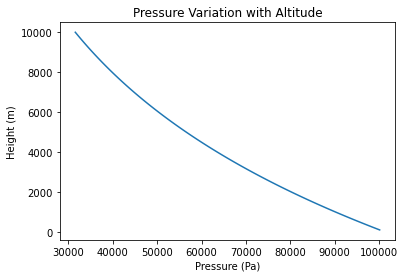

In [23]:
# output -- a plot!
fig, ax = plt.subplots()
ax.plot(pres, height)
ax.set_xlabel("Pressure (Pa)")
ax.set_ylabel("Height (m)")
ax.set_title("Pressure Variation with Altitude")

## Part 2: Clausius-Clapeyron Equation and the Atmospheric Equation of State

Over large spatial scales in the atmosphere (and ocean) we can attempt to predict the winds (or currents) by looking at spatial changes in the DENSITY. In air the density is a function of pressure, temperature, and the amount of water
vapour present - i.e.  the THERMODYNAMIC STATE*. Moist air is less dense than dry air, because H$_2$O gas is lighter than either N$_2$ or O$_2$ gas (which makes up most of the atmosphere). We often hear water vapour measurements given as a RELATIVE HUMIDITY (RH) which is the the ratio of the vapor pressure relative to the SATURATION LEVEL for a particular temperature.  The saturation level is the maximum amount of water vapour that air can hold in equilibrium (say, inside a closed bottle containing air and water, which you let sit for a long time).  A RH of 100% means it is foggy (saturated) and 0% means you are coughing and generating sparks every time you walk across a carpet! How do we get from RH to density?

First, define the following quantities:


| Symbol  | Variable      | SI Units   |
|:--------|:--------------|:------------|
| $\rho$  | Density       | $kg/m^3$   |
| $P$     | Pressure      | $Pa$   |
| $T$     | Temperature   | $K$ |
| $RH$    | Relative Humidity | $\%$ |
| $r$     | Mixing Ratio  | $\frac{kg \space water \space vapor}{kg \space dry \space air}$|
| $e$     | Vapor Pressure | $Pa$   |
| $e_s$   | Saturation Vapor Pressure | $Pa$ |

Now,  it  would  be  nice  to  have  (say)  a  single,  perhaps  complicated, equation of state for density (as oceanographers do), but in fact atmospheric scientists define things using a chain of temporary variables†. It all begins with the *Clausius-Clapeyron* equation which relates the temperature and the saturation vapour pressure:

$$
e_s = e_0\cdot exp \left[ \frac{L}{R_v}\left(\frac{1}{T_0}-\frac{1}{T}\right)\right]\tag{1}
$$

where $e_0 = 611Pa$, $L= 2.5\cdot10^6J/kg$ is the latent heat of evaporation, $T_0= 273K$ is a constant (NOT $273.15K$), and $R_v= 461J/K/kg$ (Joules per kelvin per kilogram) is the gas constant for pure water vapour. Next we have

$$
e = e_s\frac{RH}{100}\tag{2}
$$

and then 

$$
r = \frac{\varepsilon e}{P - e}\tag{3}
$$

where $\varepsilon= 0.622\frac{kg_{vapour}}{kg_{dry\space air}} \space (=R_d/R_v)$, and finally

$$
\rho = \frac{P}{R_dT(1 + 0.61r)}\tag{4}
$$

where $R_d = 287J/K/kg$ is  the  ideal  gas  constant  for  dry  air.‡ To  check  units,  remember  that  $1\space Pa  =1\space kg/m/s^2$, and $1\space J=1\space kg m^2/s^2$.

---
---
\* For oceanographers, density is a function of pressure, temperature, and salinity, and for geologists the density of (say) molten rock will depend on pressure, temperature, and its chemical composition. For this lab you just have to know that there *are* equations to figure out!

† See *Meteorology Today for Scientists and Engineers*, R. Stull

‡ You may recognize some similarity between this last equation and the IDEAL GAS LAW $P V=nRT$ which is no coincidence - in fact the $0.61r$ is a correction for the non-ideal nature of moist air.

### Your Task: Implementing the CC Equation in Python

Write a code cell which defines variables for all the constants used (i.e. $L$, $R_v$, $T_0$, $e_0$) and then find $e_s$ for a single $T$. Be sure to invent good names for all of these symbols and include their units in the comments, e. g. `Lvap = 2.5e6  # J/kg`. Run the cell to find $e_s$ at a temperature of $T= 25^oC$.  Compare this number against a CHECK VALUE 3264.0782439825894 Pa. Be careful about operator precedence and make sure you get the RIGHT answer!

In [5]:
# your code here

In [6]:
# andrew's soln

# input
Tc = 25  # deg C

# internal definitions
Tk = Tc + 273.15  # K
e0 = 611  # Pa 
Lvap = 2.5e6  # J/kg
T0 = 273  # K
Rv = 461  # J/kg/K

# calculations
esat = e0 * np.exp((Lvap / Rv) * (1 / T0 - 1 / Tk))  # eqn 1

# outputs
print(esat)

3264.0782439825894


Now add a cell to  calculate  the  air  density  at $T= 25^oC,RH= 50\%$,  at  surface  pressure  ($P= 102000Pa$).   The  answer  should  be  1.1847106098829943 kg/m$^3$ (or  1.184704073721439  if $\varepsilon≡R_d/R_v$).   Note  that  increasing  the  humidity  (i.e.   adding  more  water  vapour)  decreases  the  density since H$_2$O is displacing heavier N$_2$ and O$_2$ molecules.

In [7]:
# your code here

In [8]:
# andrew's soln

# input
RH = 50  # %
pres = 102000  # Pa

# internal definitions (this cell knows about the variables defined in the cell above,
# so just add the new ones as needed)
epsilon = 0.622  # vap/air by mass
Rd = 287  # J/kg/K

# calculations
e_x = esat * RH / 100  # eqn 2
mixrat = epsilon * e_x / (pres - e_x)  # eqn 3
rho = pres / (Rd * Tk * (1 + 0.61 * mixrat))

# output
print(rho)

1.1847106098829943


In the cell below, calculate the saturation vapour pressure $e_s$ for temperatures ranging from -40$^o$C to 30$^o$C. Be sure to stick to the format of *input, definitions, calulations, output*. This time, make your output a *scientific figure* showing the whole range of $T$ values.

In [9]:
# your code here

Text(0.5, 1.0, 'Saturation Vapour Pressure as a Function of Temperature')

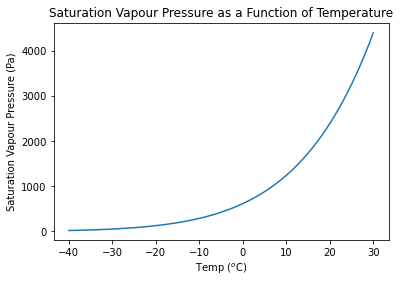

In [10]:
# andrew's soln

# input
Tc = np.arange(-40, 31)

# definitions
Tk = Tc + 273.15  # K

# calculations
esat = e0 * np.exp((Lvap / Rv) * (1 / T0 - 1 / Tk))  # eqn 1

# output (a plot!)
fix, ax = plt.subplots()
ax.plot(Tc, esat)
ax.set_xlabel("Temp ($^o$C)")
ax.set_ylabel("Saturation Vapour Pressure (Pa)")
ax.set_title("Saturation Vapour Pressure as a Function of Temperature")

Next, calculate and plot the mixing ratior as a function of temperature for $RH= 100\%$ and $P= 90000Pa$ (about 1 km above the surface).

In [11]:
# your code here

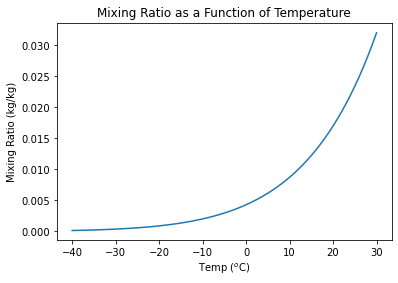

In [12]:
# andrew's soln

# input
RH = 100  # %
pres = 90000  # Pa

# calculations
e_x = esat * RH / 100  # eqn 2
mixrat = epsilon * e_x / (pres - e_x)  # eqn 3

# output
fix, ax = plt.subplots()
ax.plot(Tc, mixrat)
ax.set_xlabel("Temp ($^o$C)")
ax.set_ylabel("Mixing Ratio (kg/kg)")
ax.set_title("Mixing Ratio as a Function of Temperature");

next question asks to plot multiple lines on a figure using a 2d matrix... better saved until the loops section i think.. make subplots instead? 